In [1]:
%matplotlib widget

In [2]:
%load_ext autoreload
%autoreload 2

In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np
from train_models import Model


In [4]:
path_to_trainingset = os.path.join(
    os.path.dirname(os.path.realpath(os.path.abspath(''))),
    "data",
    "elasticc_feature_trainingset_v3",
)
assert os.path.isfile(path_to_trainingset+".parquet")

In [60]:
m1 = Model(
    stage="1", path_to_trainingset=path_to_trainingset, n_iter=1, random_state=42
)
m1.split_sample()

In [61]:
%%time
m1.train()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  20.7s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  23.0s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  23.2s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  23.1s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  21.1s
CPU times: user 23min 13s, sys: 31.2 s, total: 23min 44s

In [62]:
m1.evaluate()

[0.97005158]
[0.00057434]
[{'subsample': 0.8, 'min_child_weight': 0.2681, 'max_depth': 3, 'learning_rate': 0.1675, 'gamma': 35.405, 'colsample_bytree': 0.3899999999999999, 'colsample_bylevel': 1.0}]
Best: 0.9700515806756684 using {'subsample': 0.8, 'min_child_weight': 0.2681, 'max_depth': 3, 'learning_rate': 0.1675, 'gamma': 35.405, 'colsample_bytree': 0.3899999999999999, 'colsample_bylevel': 1.0}
We now plot the evaluation using 12 time bins


In [64]:
print(np.histogram(m1.df.class_short.values))
481333/279213

(array([481333,      0,      0,      0,      0,      0,      0,      0,
            0, 279213]), array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]))


1.7238917958691036

[  0.   2.   3.   6.   8.  12.  16.  22.  28.  37.  48.  67. 172.]


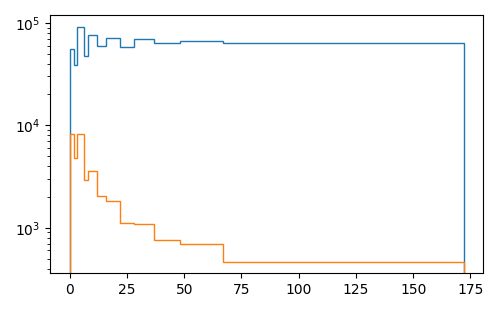

In [65]:
num=0
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(5,5./1.6), tight_layout=True)

bins_m1 = np.zeros(len(m1.evaluation_bins)+1)
bins_m1[:-1] = np.asarray(m1.evaluation_bins)[:,0]
bins_m1[-1] = m1.evaluation_bins[-1][1]
print(bins)

_ = ax.hist(m1.df.ndet, bins=bins, density=False, histtype="step", log=True)
_ = ax.hist(m1.df_test_subsample.ndet, bins=bins, density=False, histtype="step", log=True)

# stage 2a

In [54]:
m2a = Model(
    stage="2a", path_to_trainingset=path_to_trainingset, n_iter=1, random_state=42
)
m2a.split_sample()

In [55]:
%%time
m2a.train()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  10.8s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  11.4s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  11.8s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  13.0s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.3899999999999999, gamma=35.405, learning_rate=0.1675, max_depth=3, min_child_weight=0.2681, subsample=0.8; total time=  12.7s
CPU times: user 13min 2s, sys: 11.9 s, total: 13min 14s


In [56]:
m2a.evaluate()

[0.97950927]
[0.00074172]
[{'subsample': 0.8, 'min_child_weight': 0.2681, 'max_depth': 3, 'learning_rate': 0.1675, 'gamma': 35.405, 'colsample_bytree': 0.3899999999999999, 'colsample_bylevel': 1.0}]
Best: 0.9795092748698414 using {'subsample': 0.8, 'min_child_weight': 0.2681, 'max_depth': 3, 'learning_rate': 0.1675, 'gamma': 35.405, 'colsample_bytree': 0.3899999999999999, 'colsample_bylevel': 1.0}
We now plot the evaluation using 12 time bins


In [58]:
print(np.histogram(m2a.df.class_short.values))
370301/111032

(array([370301,      0,      0,      0,      0,      0,      0,      0,
            0, 111032]), array([11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ]))


3.33508357950861

[  0.   1.   2.   4.   6.   8.  10.  14.  18.  24.  33.  47. 170.]


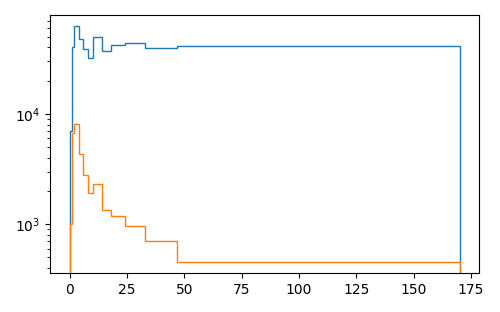

In [59]:
num=1
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(5,5./1.6), tight_layout=True)

bins = np.zeros(len(m2a.evaluation_bins)+1)
bins[:-1] = np.asarray(m2a.evaluation_bins)[:,0]
bins[-1] = m2a.evaluation_bins[-1][1]
print(bins)

_ = ax.hist(m2a.df.ndet, bins=bins, density=False, histtype="step", log=True)
_ = ax.hist(m2a.df_test_subsample.ndet, bins=bins, density=False, histtype="step", log=True)

# stage 2b

In [ ]:
m2b = Model(
    stage="2b", path_to_trainingset=path_to_trainingset, n_iter=1, random_state=23
)
m2b.split_sample()
m2b.df.class_short.unique()


In [18]:
np.histogram(m2b.df.class_short.values)

(array([230957,      0,      0,      0,      0,      0,      0,      0,
             0,  48256]),
 array([21. , 21.1, 21.2, 21.3, 21.4, 21.5, 21.6, 21.7, 21.8, 21.9, 22. ]))

In [30]:
%%time
m2b.train()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bylevel=1.0, colsample_bytree=0.8099999999999996, gamma=16.04, learning_rate=0.081, max_depth=7, min_child_weight=0.4141, subsample=0.45; total time=   6.3s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.8099999999999996, gamma=16.04, learning_rate=0.081, max_depth=7, min_child_weight=0.4141, subsample=0.45; total time=   7.0s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.8099999999999996, gamma=16.04, learning_rate=0.081, max_depth=7, min_child_weight=0.4141, subsample=0.45; total time=   7.1s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.8099999999999996, gamma=16.04, learning_rate=0.081, max_depth=7, min_child_weight=0.4141, subsample=0.45; total time=   7.4s
[CV] END colsample_bylevel=1.0, colsample_bytree=0.8099999999999996, gamma=16.04, learning_rate=0.081, max_depth=7, min_child_weight=0.4141, subsample=0.45; total time=   7.6s
CPU times: user 7min 53s, sys: 5.85 s, total: 7min 59s
Wall t

In [31]:
m2b.evaluate()

[1.]
[0.]
[{'subsample': 0.45, 'min_child_weight': 0.4141, 'max_depth': 7, 'learning_rate': 0.081, 'gamma': 16.04, 'colsample_bytree': 0.8099999999999996, 'colsample_bylevel': 1.0}]
Best: 1.0 using {'subsample': 0.45, 'min_child_weight': 0.4141, 'max_depth': 7, 'learning_rate': 0.081, 'gamma': 16.04, 'colsample_bytree': 0.8099999999999996, 'colsample_bylevel': 1.0}
We now plot the evaluation using 12 time bins


[  0.   5.  10.  15.  21.  26.  33.  39.  47.  55.  66.  84. 172.]


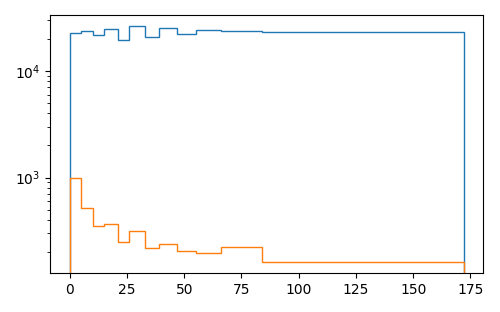

In [53]:
num=2
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(5,5./1.6), tight_layout=True)

bins = np.zeros(len(m2b.evaluation_bins)+1)
bins[:-1] = np.asarray(m2b.evaluation_bins)[:,0]
bins[-1] = m2b.evaluation_bins[-1][1]
print(bins)

_ = ax.hist(m2b.df.ndet, bins=bins, density=False, histtype="step", log=True)
_ = ax.hist(m2b.df_test_subsample.ndet, bins=bins, density=False, histtype="step", log=True)

Model 1: [  0.   2.   3.   6.   8.  12.  16.  22.  28.  37.  48.  67. 172.]
Model 2a: [  0.   1.   2.   4.   6.   8.  10.  14.  18.  24.  33.  47. 170.]
Model 2b: [  0.   5.  10.  15.  21.  26.  33.  39.  47.  55.  66.  84. 172.]


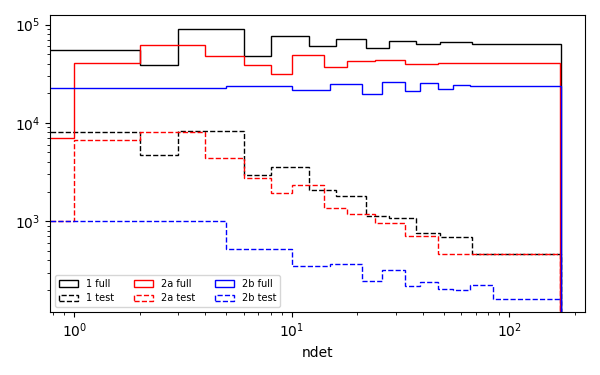

In [81]:
num=3
plt.close(num)
fig, ax = plt.subplots(num=num, figsize=(6,6./1.6), tight_layout=True)

# stage 1
model_name = "1"
bins_m1 = np.zeros(len(m1.evaluation_bins)+1)
bins_m1[:-1] = np.asarray(m1.evaluation_bins)[:,0]
bins_m1[-1] = m1.evaluation_bins[-1][1]
print(f"Model {model_name}: {bins_m1}")

ax.hist(m1.df.ndet, bins=bins_m1, density=False, histtype="step", log=True, color="k", label=f"{model_name} full")
ax.hist(m1.df_test_subsample.ndet, bins=bins_m1, density=False, histtype="step", log=True, color="k", ls="--", label=f"{model_name} test")

# stage 2a
model_name = "2a"
bins_m2a = np.zeros(len(m2a.evaluation_bins)+1)
bins_m2a[:-1] = np.asarray(m2a.evaluation_bins)[:,0]
bins_m2a[-1] = m2a.evaluation_bins[-1][1]
print(f"Model {model_name}: {bins_m2a}")

ax.hist(m2a.df.ndet, bins=bins_m2a, density=False, histtype="step", log=True,  color="r", label=f"{model_name} full")
ax.hist(m2a.df_test_subsample.ndet, bins=bins_m2a, density=False, histtype="step", log=True, color="r", ls="--", label=f"{model_name} test")

# stage 2b
model_name = "2b"
bins_m2b = np.zeros(len(m2b.evaluation_bins)+1)
bins_m2b[:-1] = np.asarray(m2b.evaluation_bins)[:,0]
bins_m2b[-1] = m2b.evaluation_bins[-1][1]
print(f"Model {model_name}: {bins_m2b}")

ax.hist(m2b.df.ndet, bins=bins_m2b, density=False, histtype="step", log=True, color="b", label=f"{model_name} full")
ax.hist(m2b.df_test_subsample.ndet, bins=bins_m2b, density=False, histtype="step", log=True, color="b", ls="--", label=f"{model_name} test")

ax.set_xlabel("ndet")
ax.set_xscale("log")
_ = ax.legend(fontsize=7, ncol=3, loc=3)